In [1]:
import xarray as xr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs # for projection
import cartopy.feature as cfeature # for map features 
from cartopy.util import add_cyclic_point

In [2]:
ds = xr.open_dataset('https://thredds.rda.ucar.edu/thredds/dodsC/aggregations/g/ds633.1/2/TP',
                     chunks={'time':'500MB'})

variables = ['Total_column_water_vapour_surface_Mixed_intervals_Average',
        'Sea_surface_temperature_surface_Mixed_intervals_Average']


In [3]:
#select the two needed variables every 4th point to get 1 degree resolution
ds = ds[variables].sel(lat=slice(65, -65, 4), lon=slice(120, 300, 4))

In [4]:
ds

<xarray.Dataset>
Dimensions:                                                    (time: 516,
                                                                lat: 130,
                                                                lon: 181)
Coordinates:
  * lat                                                        (lat) float32 ...
  * lon                                                        (lon) float32 ...
  * time                                                       (time) datetime64[ns] ...
    reftime                                                    (time) datetime64[ns] dask.array<chunksize=(516,), meta=np.ndarray>
Data variables:
    Total_column_water_vapour_surface_Mixed_intervals_Average  (time, lat, lon) float32 dask.array<chunksize=(120, 130, 181), meta=np.ndarray>
    Sea_surface_temperature_surface_Mixed_intervals_Average    (time, lat, lon) float32 dask.array<chunksize=(120, 130, 181), meta=np.ndarray>
Attributes:
    Originating_or_generating_Center:     European Centre for Medium Range We...
    Originating_or_generating_Subcenter:  0
    GRIB_table_version:                   0,128
    file_format:                          GRIB-1
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    _CoordSysBuilder:                     ucar.nc2.dataset.conv.CF1Convention

In [5]:
ds.to_netcdf('raw_data.nc')

In [3]:
data = xr.open_dataset('raw_data.nc')

In [4]:
data

<xarray.Dataset>
Dimensions:                                                    (time: 516,
                                                                lat: 130,
                                                                lon: 181)
Coordinates:
  * lat                                                        (lat) float32 ...
  * lon                                                        (lon) float32 ...
  * time                                                       (time) datetime64[ns] ...
    reftime                                                    (time) datetime64[ns] ...
Data variables:
    Total_column_water_vapour_surface_Mixed_intervals_Average  (time, lat, lon) float32 ...
    Sea_surface_temperature_surface_Mixed_intervals_Average    (time, lat, lon) float32 ...
Attributes:
    Originating_or_generating_Center:     European Centre for Medium Range We...
    Originating_or_generating_Subcenter:  0
    GRIB_table_version:                   0,128
    file_format:                          GRIB-1
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    _CoordSysBuilder:                     ucar.nc2.dataset.conv.CF1Convention

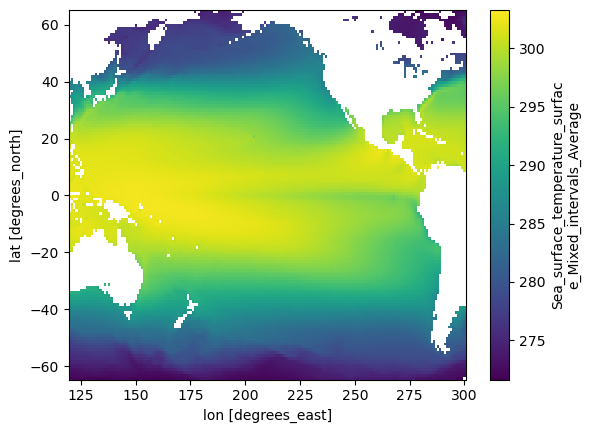

In [5]:
data['Sea_surface_temperature_surface_Mixed_intervals_Average'].mean(dim='time').plot()

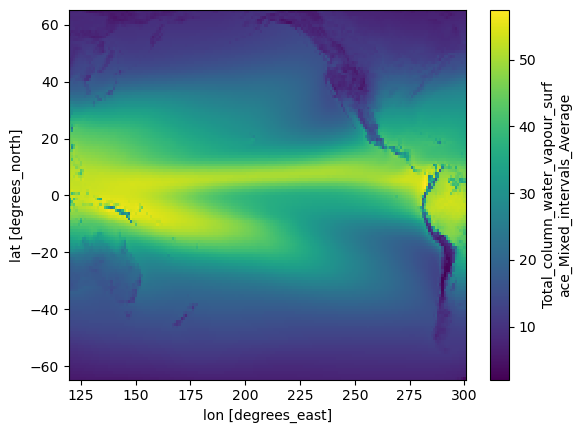

In [6]:
data['Total_column_water_vapour_surface_Mixed_intervals_Average'].mean(dim='time').plot()

In [7]:
lon = data['lon']
lat = data['lat']
sst_ltmean = data['Sea_surface_temperature_surface_Mixed_intervals_Average'].mean(dim='time')
tcwv_ltmean = data['Total_column_water_vapour_surface_Mixed_intervals_Average'].mean(dim='time')

# Create your meshgrid using lon and lat
X, Y = np.meshgrid(lon, lat)

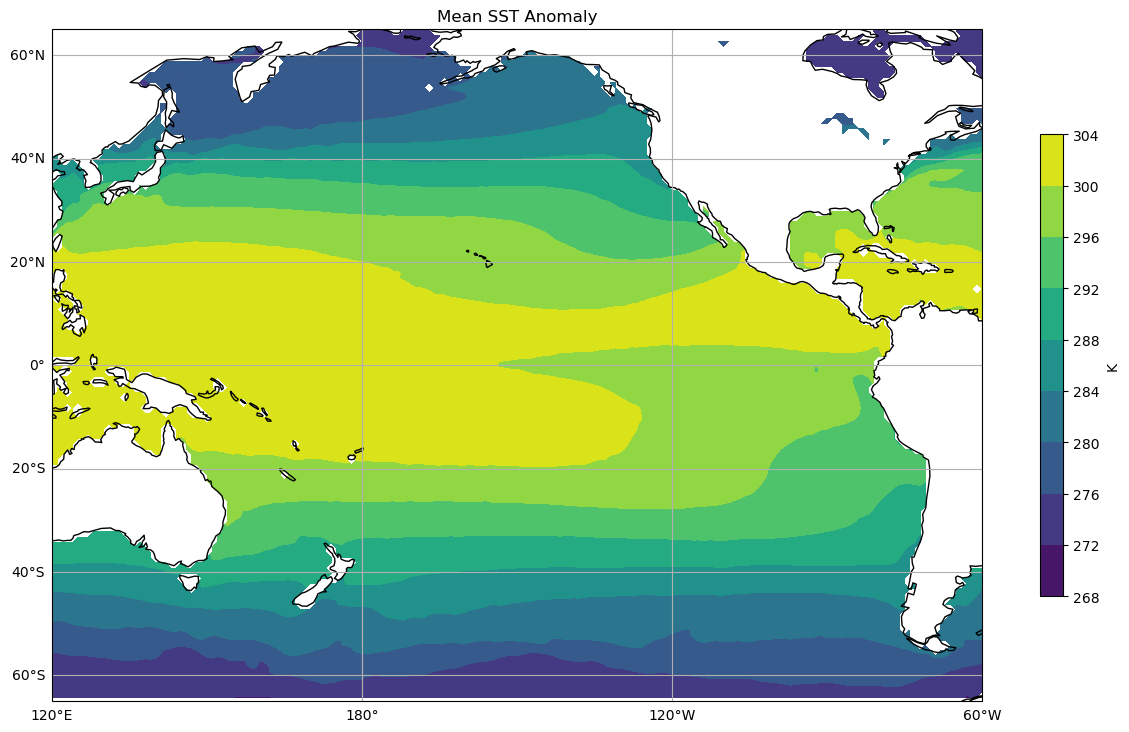

In [8]:
# A common projection to use 
proj=ccrs.PlateCarree(central_longitude=180)

#Create a figure with an axes object on which we will plot. Pass the projection to that axes.
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax.coastlines()
ax.set_title('Mean SST Anomaly')
ax.set_extent((120, 300, -65, 65), crs=ccrs.PlateCarree())

cs = ax.contourf(X, Y, sst_ltmean, transform=ccrs.PlateCarree())
cb=fig.colorbar(cs,shrink=0.4)

cb.set_label("K")

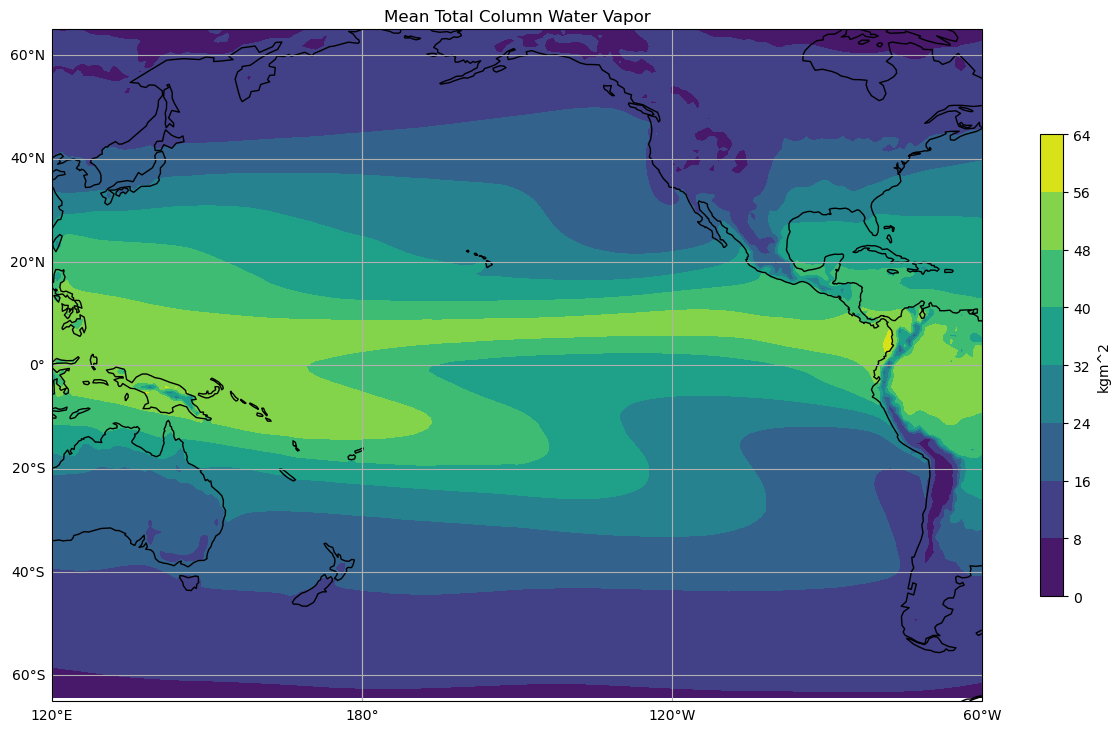

In [9]:
# A common projection to use 
proj=ccrs.PlateCarree(central_longitude=180)

#Create a figure with an axes object on which we will plot. Pass the projection to that axes.
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax.coastlines()
ax.set_title('Mean Total Column Water Vapor')
ax.set_extent((120, 300, -65, 65), crs=ccrs.PlateCarree())

cs = ax.contourf(X, Y, tcwv_ltmean, transform=ccrs.PlateCarree())
cb=fig.colorbar(cs,shrink=0.4)

cb.set_label("kgm^2")

In [10]:
masked_data = data.where(data['Sea_surface_temperature_surface_Mixed_intervals_Average'].notnull())

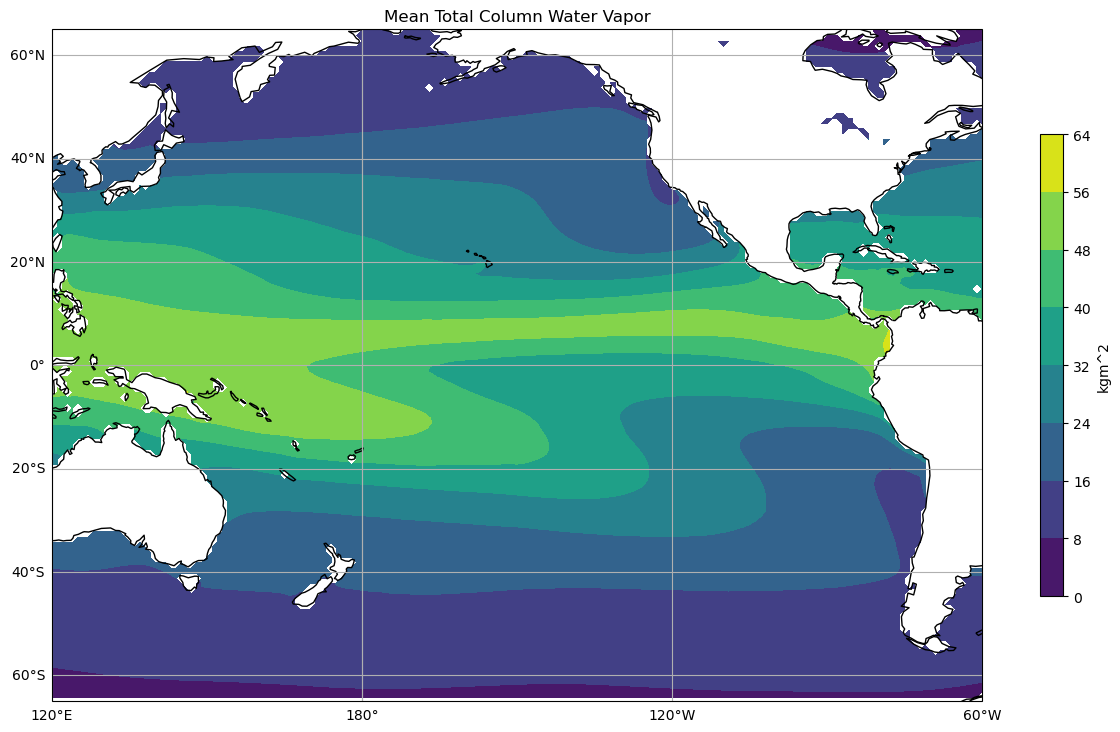

In [11]:
# Test mask by plotting mean total column water vapoer to ensure no values are plotted over land
proj=ccrs.PlateCarree(central_longitude=180)

#Create a figure with an axes object on which we will plot. Pass the projection to that axes.
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax.coastlines()
ax.set_title('Mean Total Column Water Vapor')
ax.set_extent((120, 300, -65, 65), crs=ccrs.PlateCarree())

cs = ax.contourf(X, Y, masked_data['Total_column_water_vapour_surface_Mixed_intervals_Average'].mean(dim='time'), transform=ccrs.PlateCarree())
cb=fig.colorbar(cs,shrink=0.4)

cb.set_label("kgm^2")

In [12]:
sst = data['Sea_surface_temperature_surface_Mixed_intervals_Average']
tcwv = data['Total_column_water_vapour_surface_Mixed_intervals_Average']

In [13]:
sst

<xarray.DataArray 'Sea_surface_temperature_surface_Mixed_intervals_Average' (
                                                                             time: 516,
                                                                             lat: 130,
                                                                             lon: 181)>
array([[[      nan,       nan, ..., 271.4602 , 271.46118],
        [      nan,       nan, ..., 271.48364, 272.14478],
        ...,
        [273.76782, 273.75806, ..., 274.1194 , 273.81274],
        [273.04907, 273.0647 , ..., 271.44165,       nan]],

       [[      nan,       nan, ..., 271.4602 , 271.4602 ],
        [      nan,       nan, ..., 271.46313, 271.89087],
        ...,
        [273.49536, 273.50806, ..., 273.927  , 273.71802],
        [272.51587, 272.54907, ..., 271.73657,       nan]],

       ...,

       [[      nan,       nan, ..., 272.99854, 273.05615],
        [      nan,       nan, ..., 273.2378 , 274.1714 ],
        ...,
        [271.6831 , 271.85596, ..., 273.1001 , 272.63135],
        [271.46045, 271.46045, ..., 271.98682,       nan]],

       [[      nan,       nan, ..., 271.6001 , 271.63037],
        [      nan,       nan, ..., 271.7202 , 272.53467],
        ...,
        [272.7915 , 272.8169 , ..., 273.6831 , 273.01416],
        [272.1079 , 272.24658, ..., 272.8042 ,       nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
  * lon      (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
    reftime  (time) datetime64[ns] ...
Attributes: (12/15)
    long_name:                       Sea surface temperature (Mixed_intervals...
    units:                           K
    description:                     v-component of wind
    grid_mapping:                    LatLon_Projection
    Grib_Statistical_Interval_Type:  Average
    Grib_Variable_Id:                VAR_98-0-128-34_L1_Imixed_S123
    ...                              ...
    Grib1_Parameter:                 34
    Grib1_Parameter_Name:            sst
    Grib1_Level_Type:                1
    Grib1_Level_Desc:                Ground or water surface
    Grib1_Interval_Type:             123
    Grib1_Interval_Name:             Average of N uninitialized analyses, int...

In [23]:
#Deseasonalize data and compute anomalies
clm_sst = sst.groupby('time.month').mean(dim='time', skipna='True')
anm_sst = (sst.groupby('time.month') - clm_sst)

clm_tcwv = tcwv.groupby('time.month').mean(dim='time', skipna='True')
anm_tcwv = (tcwv.groupby('time.month') - clm_tcwv)

In [15]:
#Standardize data
sst_SD = anm_sst/anm_sst.std(dim='time')
tcwv_SD = anm_tcwv/anm_tcwv.std(dim='time')

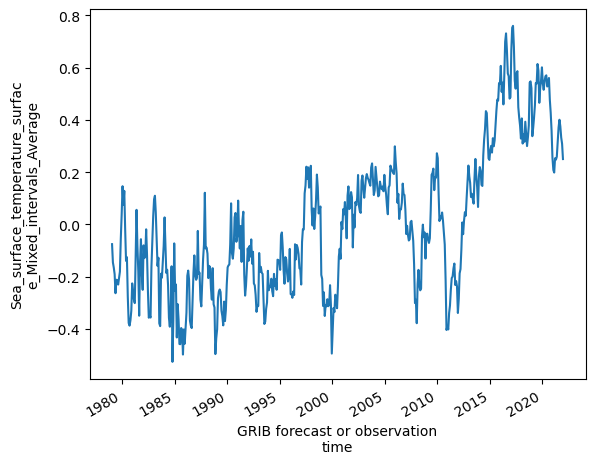

In [16]:
#Plot timeseries to see if there is a trend
sst_SD.mean(dim=['lat', 'lon']).plot()

In [148]:
#Detrend data (Used function from https://climate.usu.edu/people/yoshi/pyclm101/monthly.html for this section)
def detrend_dim(da, dim, deg=1):
    #detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

danm_sst = detrend_dim(sst_SD,'time',1)

danm_tcwv = detrend_dim(tcwv_SD,'time',1)

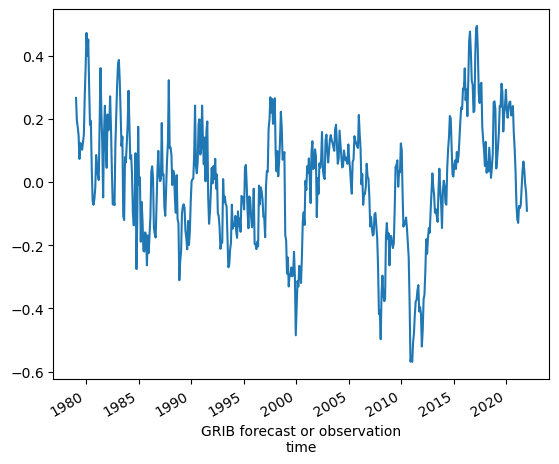

In [46]:
#Detrended time series
danm_sst.mean(dim=['lat','lon']).plot()

In [47]:
#Perform EOF analysis with cos lat weighting
from eofs.xarray import Eof
from eofs.examples import example_data_path

coslat = np.cos(np.deg2rad(rdanm_sst.coords['lat'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(danm_sst, weights=wgts)

In [159]:
eof1 = solver.eofsAsCorrelation(neofs=5) #calculate the first 5 EOFs

Text(0.5, 1.0, 'EOF5 expressed as correlation')

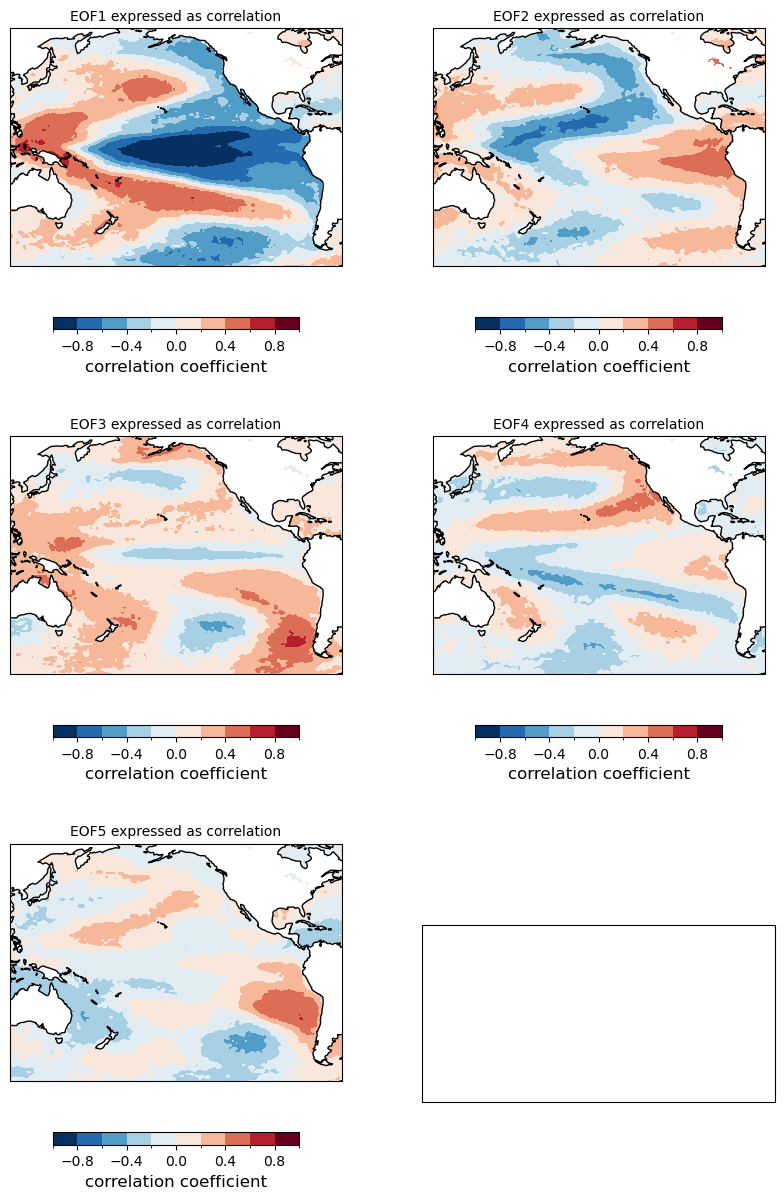

In [158]:
# Plot first 5 EOFs as correlation
fig, ax = plt.subplots(3,2,figsize=(10,15),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=190)))

clevs = np.linspace(-1, 1, 11)

fill = eof1[0].plot.contourf(ax=ax[0,0], levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax[0,0].add_feature(cfeature.COASTLINE, edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal', shrink=0.7)
cb.set_label('correlation coefficient', fontsize=12)
ax[0,0].set_title('EOF1 expressed as correlation', fontsize=10)

fill = eof1[1].plot.contourf(ax=ax[0,1], levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax[0,1].add_feature(cfeature.COASTLINE, edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal', shrink=0.7)
cb.set_label('correlation coefficient', fontsize=12)
ax[0,1].set_title('EOF2 expressed as correlation', fontsize=10)

fill = eof1[2].plot.contourf(ax=ax[1,0], levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax[1,0].add_feature(cfeature.COASTLINE, edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal', shrink=0.7)
cb.set_label('correlation coefficient', fontsize=12)
ax[1,0].set_title('EOF3 expressed as correlation', fontsize=10)

fill = eof1[3].plot.contourf(ax=ax[1,1], levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax[1,1].add_feature(cfeature.COASTLINE, edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal', shrink=0.7)
cb.set_label('correlation coefficient', fontsize=12)
ax[1,1].set_title('EOF4 expressed as correlation', fontsize=10)

fill = eof1[4].plot.contourf(ax=ax[2,0], levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax[2,0].add_feature(cfeature.COASTLINE, edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal', shrink=0.7)
cb.set_label('correlation coefficient', fontsize=12)
ax[2,0].set_title('EOF5 expressed as correlation', fontsize=10)

In [52]:
varfrac = solver.varianceFraction()

(2.579912188048567e-33, 0.20022939152857333)

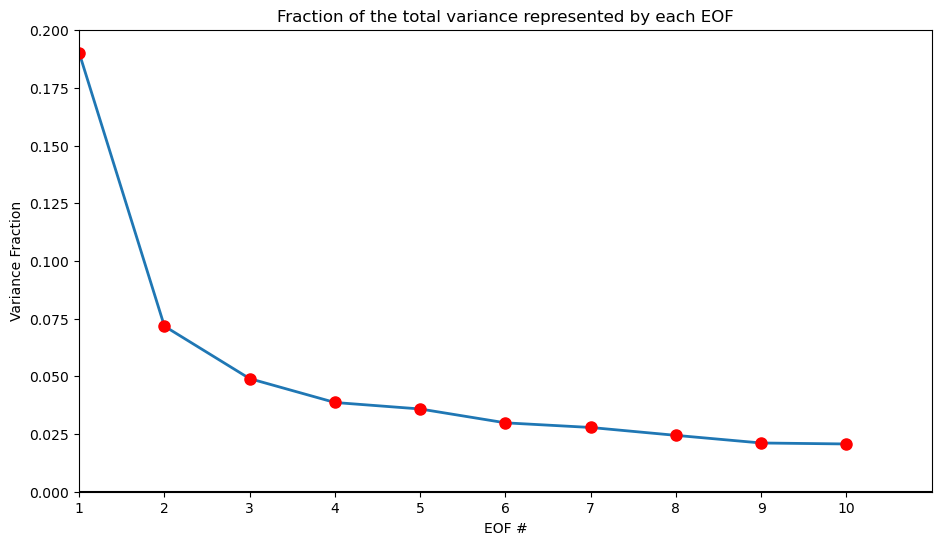

In [93]:
# Plot the fraction of variance explained by each the first 10 EOFs
plt.figure(figsize=(11,6))
eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2)
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 11))
plt.title('Fraction of the total variance represented by each EOF')
plt.xlabel('EOF #')
plt.ylabel('Variance Fraction')
plt.xlim(1, 11)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)

In [95]:
reconstruction = solver.reconstructedField(5) #reconstruct SST field using first 5 EOFs
reconstruction

<xarray.DataArray (time: 516, lat: 130, lon: 181)>
array([[[            nan,             nan,             nan, ...,
          1.58092507e-01,  1.70181023e-01,  1.68724300e-01],
        [            nan,             nan,             nan, ...,
          1.26834491e-01,  1.52364730e-01,  1.68184735e-01],
        [            nan,             nan,             nan, ...,
          1.00673974e-01,  2.09633420e-01,  2.58785958e-01],
        ...,
        [ 1.65676453e-01,  1.61220773e-01,  1.70842566e-01, ...,
          2.91901160e-01,  3.13016797e-01,  3.68153892e-01],
        [ 3.76369864e-02,  5.68078703e-02,  5.57580380e-02, ...,
          2.83589628e-01,  3.34200981e-01,  3.03485167e-01],
        [ 5.15998333e-02,  5.21480733e-02,  3.77539962e-02, ...,
         -3.28977438e-02, -4.86043717e-02,             nan]],

       [[            nan,             nan,             nan, ...,
          3.34341160e-01,  3.62942197e-01,  3.34875737e-01],
        [            nan,             nan,             nan, ...,
          2.80438561e-01,  2.91043600e-01,  2.70657315e-01],
        [            nan,             nan,             nan, ...,
          2.15912560e-01,  2.87615671e-01,  3.05627021e-01],
...
        [ 1.19790234e-01,  1.02030825e-01,  7.68301287e-02, ...,
          2.02587985e-01,  1.66439650e-01,  1.26944375e-01],
        [-4.94119264e-02, -1.14083519e-02,  2.45834221e-02, ...,
          1.68030368e-01,  1.79602583e-01,  3.80277477e-04],
        [-1.41082238e-01, -1.09186143e-01, -8.63538334e-02, ...,
          8.44488081e-02,  9.11811968e-02,             nan]],

       [[            nan,             nan,             nan, ...,
          1.35642338e-01,  1.39670448e-01,  1.74401790e-01],
        [            nan,             nan,             nan, ...,
          1.70203469e-01,  1.95416431e-01,  2.60964748e-01],
        [            nan,             nan,             nan, ...,
          1.90089750e-01,  2.45464285e-01,  3.32220787e-01],
        ...,
        [ 7.01298642e-02,  5.90101701e-02,  5.26211481e-02, ...,
          1.53145799e-01,  1.00428616e-01,  4.81187299e-02],
        [-7.51561261e-02, -1.32589210e-02,  4.93451804e-03, ...,
          5.81408953e-02,  8.48157119e-02, -8.22711369e-02],
        [-1.40151556e-01, -1.06670751e-01, -8.12939501e-02, ...,
          6.16005709e-02,  7.97232002e-02,             nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
  * lat      (lat) float32 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
  * lon      (lon) float32 120.0 121.0 122.0 123.0 ... 297.0 298.0 299.0 300.0
    reftime  (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  None_reconstructed_with_5_EOFs

In [100]:
correlation = xr.corr(danm_sst, reconstruction, dim='time') #calculate the correlation coefficient between reconstructed field adn original SST field

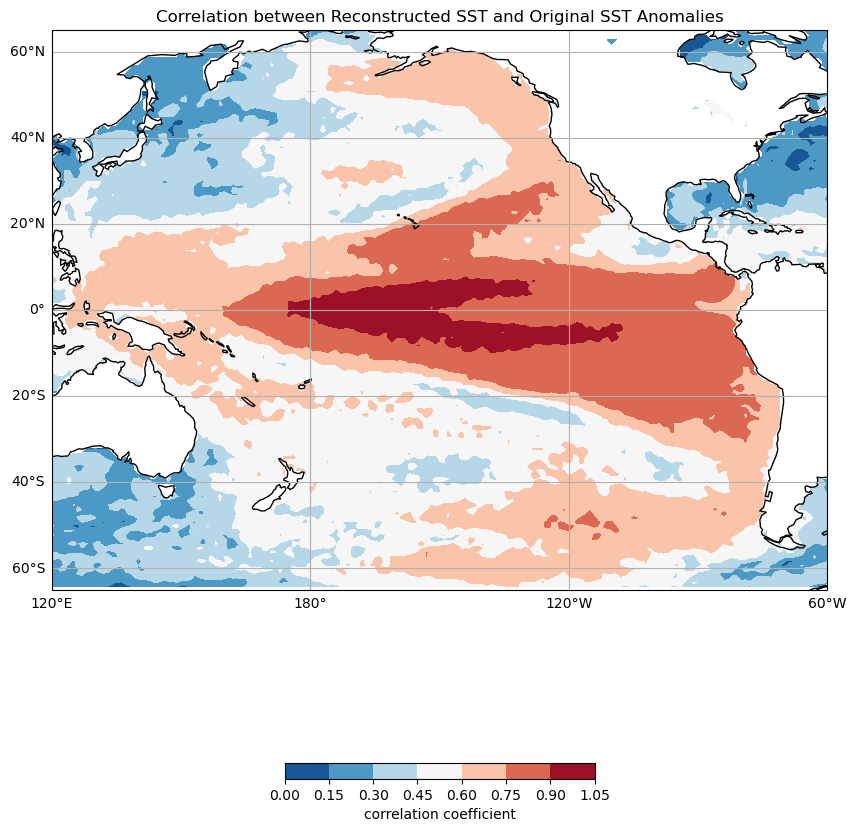

In [113]:
proj=ccrs.PlateCarree(central_longitude=180)

fig, ax = plt.subplots(figsize=(10,15),subplot_kw=dict(projection=proj))

gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

ax.coastlines()
ax.set_title('Correlation between Reconstructed SST and Original SST Anomalies')
ax.set_extent((120, 300, -65, 65), crs=ccrs.PlateCarree())

cs = ax.contourf(X, Y, correlation, transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
cb=fig.colorbar(cs, orientation='horizontal', shrink=0.4)

cb.set_label("correlation coefficient")

In [171]:
reconstruction2 = solver.reconstructedField(1) #reconsruct field using first EOF

correlation2 = xr.corr(danm_tcwv, reconstruction2, dim='time') #calculate correlation between 1st EOF recnstruction and TCWV anomalies

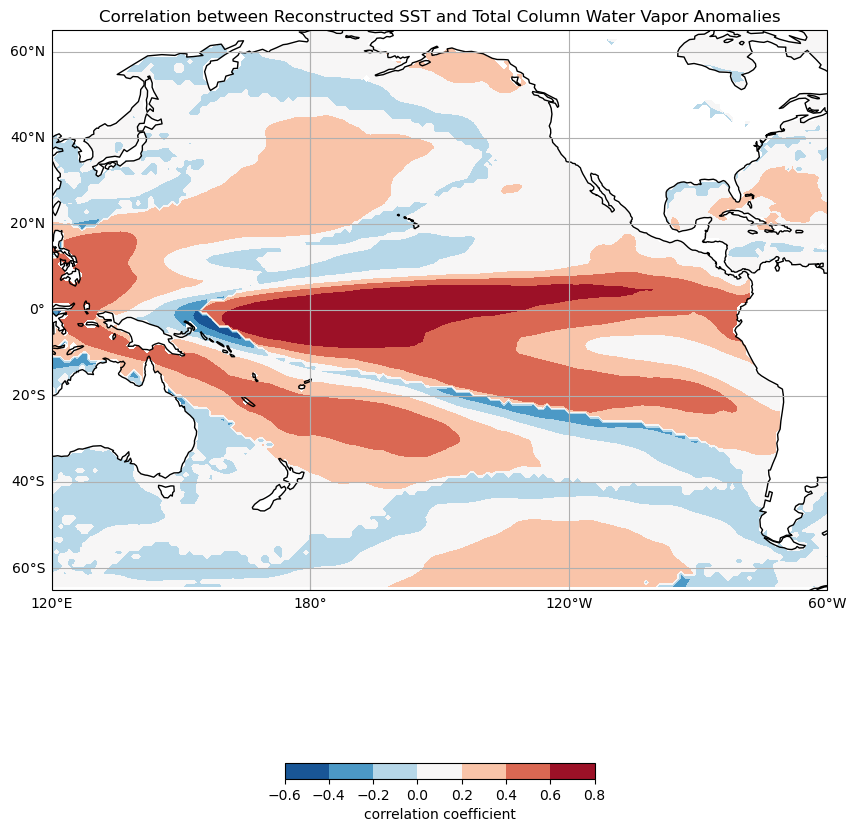

In [165]:
proj=ccrs.PlateCarree(central_longitude=180)

fig, ax = plt.subplots(figsize=(10,15),subplot_kw=dict(projection=proj))

gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

ax.coastlines()
ax.set_title('Correlation between Reconstructed SST and Total Column Water Vapor Anomalies')
ax.set_extent((120, 300, -65, 65), crs=ccrs.PlateCarree())

cs = ax.contourf(X, Y, correlation2, transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
cb=fig.colorbar(cs, orientation='horizontal', shrink=0.4)

cb.set_label("correlation coefficient")

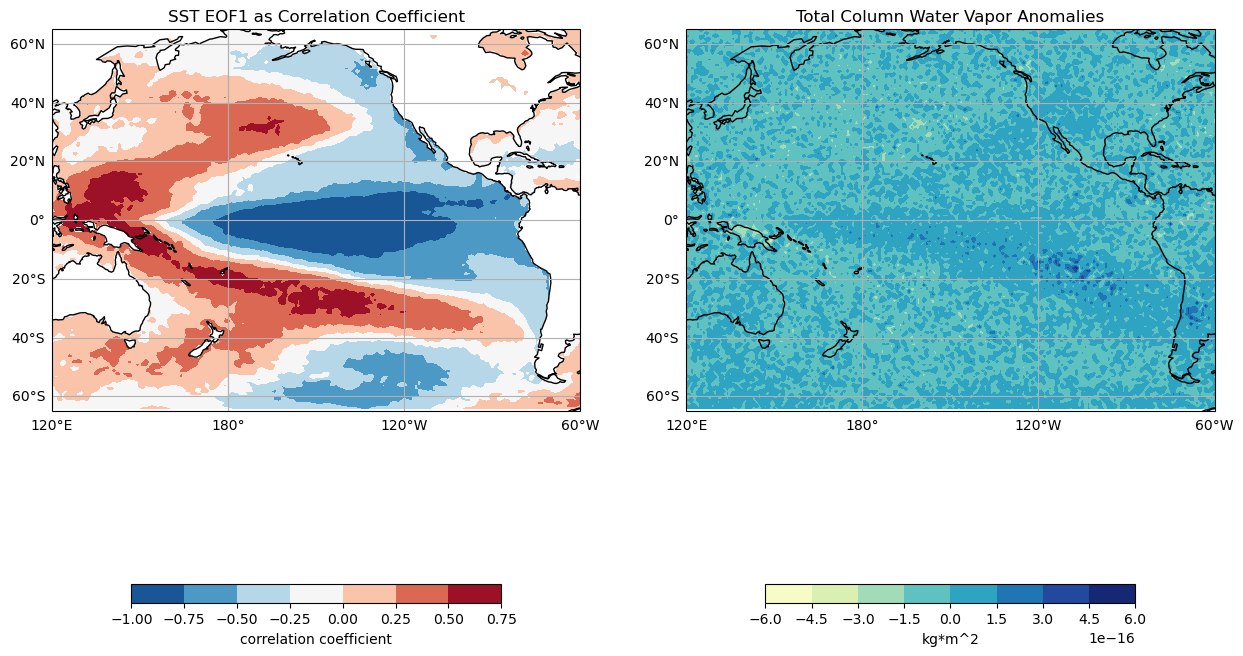

In [161]:
proj=ccrs.PlateCarree(central_longitude=180)

#Create a figure with an axes object on which we will plot. Pass the projection to that axes.
fig, ax = plt.subplots(1, 2, figsize=(15,15),subplot_kw=dict(projection=proj))

# Some options involving the gridlines
gl = ax[0].gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax[0].coastlines()
ax[0].set_title('SST EOF1 as Correlation Coefficient')
ax[0].set_extent((120, 300, -65, 65), crs=ccrs.PlateCarree())

cs = ax[0].contourf(X, Y, eof1[0], transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
cb=fig.colorbar(cs,orientation='horizontal', shrink=0.7)

cb.set_label("correlation coefficient")

gl = ax[1].gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax[1].coastlines()
ax[1].set_title('Total Column Water Vapor Anomalies')
ax[1].set_extent((120, 300, -65, 65), crs=ccrs.PlateCarree())

cs = ax[1].contourf(X, Y, danm_tcwv.mean(dim='time'), transform=ccrs.PlateCarree(), cmap=plt.cm.YlGnBu)
cb=fig.colorbar(cs,orientation='horizontal', shrink=0.7)

cb.set_label("kg*m^2")